# Pandas Series Lab

## Exploring the Series Class in Pandas

## Problem Statement

In this lab, we'll get hands-on practice with the all the cool things the `Series` class in `pandas` has to offer!


### Objectives

1. Create a basic `Series` object and set the index. 
1. Use pandas to read in data and store in a `Series`  object.
1. Gain familiarity with the basic functionality of series objects and the methods it contains.
1. Create basic plots out of data stored in a pandas series.


## Overview

Data scientists use pandas for two main data types: **_Dataframes_** and **_Series_**.  In this lab, we'll explore the **_Series_** object.  

As with anytime you find yourself working with an industry-standard library or framework, it's always a good idea to familiarize yourself with the documentation.  If you find yourself stuck during this lab, or you're just curious to the pandas `Series` class, take a look at the [pandas series docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)!

We'll start by importing pandas library and aliasing it as `pd`--this is a typical convention you'll see anytime you work with pandas.  

**Import `pandas` as `pd` in the cell below.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Creating Pandas Series 

We'll begin by exploring a couple different ways of creating pandas `Series` objects.  

We can create an empty pandas series by instantiating a `Series()` object and storing it in a variable. 

For example:

```python
some_empty_series = pd.Series()
```

We can also create a Series and pass in the data during instantiation. 

```python
example_series = pd.Series([1, 2, 3, 4])
```
Create an example series and pass in an array of numbers below.  

In [2]:
example_series = pd.Series([1, 2, 3, 4])
example_series

0    1
1    2
2    3
3    4
dtype: int64

Notice those numbers on the left? Those are **_index values_**, which we can use to access a specific value (or range of values).  For instance, if we wanted to get the value that is stored at index 1, we can use a slicing operator to get that value, just like a python list.  

```python
data_at_index_1 = example_series[1]
```

You can also access a range of data.  In the cell below, see if you access the range of data from index 1 to the end of the series. 

In [3]:
range_of_data = example_series[1:]
range_of_data

1    2
2    3
3    4
dtype: int64

### Data Types in Series Objects

One way that pandas objects differs from vanilla python collections is the ability to handle multiple data types.  Recall that python lists are dynamically typed--we can create lists that hold multiple objects with different data types.  In pure python, something like:

```python
customer_info = ['Jane Doe', True, 32, 1337.00, [1, 2, 'a', 'b']]
```

is totally fine.  

In pandas, everything is powered by **_numpy_**, so things work a little differently.  Pandas `Series` objects are backed by numpy arrays, which are **_statically typed_**, meaning that all data contained in the numpy array must be of the same data type.  

So what happens when we pass in data to a Pandas series that contains multiple data types? Try it in the cell below and see what happens. Create a new pandas Series called customer_info_series, and pass in the python list in called `customer_info` in the list above. Then, access `customer_info_series` to see the values it contains, as well as the **_dtype_** (short for _data type_) everything is stored as.

In [4]:
customer_info_series = pd.Series(['Jane Doe', True, 32, 1337.00, [1, 2, 'a', 'b']])

customer_info_series

0        Jane Doe
1            True
2              32
3            1337
4    [1, 2, a, b]
dtype: object

As we can see from the cell above, all data has been cast to the **_object_** type, which is just how pandas labels strings.  This makes sense, if we think about it--all types of data can be cast to strings, so when pandas is faced with data containing multiple types, it just converts them all to strings before storing it in the `Series` object.  

 

## Working With the Index

One handy trick that we can make use of is setting more informative values for the index.  This is something that we can do with both dataframes and series. 

One way we can set unique index values is to pass in the data as a dictionary when creating the `Series` object.  Pandas is smart enough to set the keys as the indices, and the values as the, uh, values. 

```python
avg_temperature = {
'March': 58,
'April': 64,
'May': 74,
'June': 80,
'July': 83
}
```

In the cell below, create a pandas series and pass in the dictionary shown above.  Then, access the pandas series to see what it looks like.

In [5]:
avg_temperature = {
'March': 58,
'April': 64,
'May': 74,
'June': 80,
'July': 83
}

temp_series = pd.Series(avg_temperature)

As with any index, we can access the value by passing in the index.

In the cell below, use the slicing operator on the `temp_series` object to get the value for 'April'.  Store the value in the april_temp variable.

In [6]:
april_temp = temp_series['April']
april_temp

64

Even though our index values are now strings instead of numbers, we can still access a range of data.  In the cell below, try grabbing the temperature for April through June.  

In [7]:
april_to_june = temp_series['April':'June']
april_to_june

April    64
July     83
June     80
dtype: int64

### Using Built-in Methods for Descriptive Statistics

One of things that makes pandas a favorite tool of data scientists is all the built-in statistical tooling.  Since pandas wraps the numpy library, we have instant access to an amazing amount of math and statistics tools directly through pandas dataframes and series.  This saves us time and code.  

Let's start by playing with some examples.

If we wanted to get the mean of the data contained within a pandas series, we can call `.mean()` directly from the series object.  

As a side note, the Jupyter notebook environment makes exploring the attributes and methods available to us really easy.  If we ever want to see the full list of attributes and methods we can access from an object, just type the name of the object, followed by a dot, and then hit tab.  

See if you can find the correct methods to find the mean, median, and standard deviation of the data stored in the `temp_series` object.  Store each data in the appropriate variable below.


In [8]:
mean_temp = temp_series.mean()
median_temp = temp_series.median()
std_dev_temp = temp_series.std()

print("Mean Temperature: {}".format(mean_temp))
print("Median Temperature: {}".format(median_temp))
print('Standard Deviation: {}'.format(std_dev_temp))

Mean Temperature: 71.8
Median Temperature: 74.0
Standard Deviation: 10.59245014149229


### Real World Practice--Time Series Data

One common use case for pandas `Series` objects is to store **_Time Series_** data.  For Time Series data, the most intuitive thing we can use for an index is a datetime, which would allow us to easily check the value of something at a given time. 

To finish up this lab, we'll read in some real time series data about the temperature in Central Park.  All together, we will:

1. Read in the data stored in `weather_data_nyc.csv`.
1. Store the data in a `Series`.
1. Convert the timestamps from strings to datetimes
1. Set the datetimes as the Series index.
1. Explore our data with descriptive statistics.
1. Plot our time series in a beautiful graph!

Let's get started!

### 1.  Read in the Data

The data is stored in csv file called `weather_data_nyc.csv`.  Pandas makes it easy to read in data from many different types of data sources.  We can read in the data by calling `pd.read_csv()` and passing in the filename (or the path to the filename, if it's not stored in the same directory as the jupyter notebook we're working out of).  

Read in the csv by passing the filename in the `.read_csv()` method call. Store the object that is returned in the `df` variable.  Then, access the `df` variable to see what data we've read in.  Pass in `names=['Date', 'Temp']` as a keyword argument after the filename to give our columns appropriate names, which will make it easier to access the data later on.  

In [9]:
df = pd.read_csv('weather_data_nyc.csv', names=['Date', 'Temp'])
df

,Date,Temp
0,1/1/2016,38.0
1,1/2/2016,51.5
2,1/3/2016,45.5
3,1/4/2016,70.0
4,1/5/2016,48.0
5,1/6/2016,74.5
6,1/7/2016,72.5
7,1/8/2016,74.5
8,1/9/2016,74.0
9,1/10/2016,59.0


### 2. Store the data in a Series.

As it currently stands, the data is stored in a `DataFrame` object.  The data currently has two columns, which means that we can't store it in a series in it's current format.  However, any time we access a single column of data from a dataframe, that column is returned as a `Series` object.  

In the cell below, slice the `Temp` column from the `df` object, and store the object that is returned inside the `temp_ts` variable.  

Hint: We can access a column of data in a dataframe by using the following syntax:

```python
# Get data stored in 'Some_Column'
df['Some_Column']
```

In [10]:
temp_ts = df['Temp']

### 3. Convert Dates from String To Datetime Format

Currently, the data stored within `df['Date']` is stored as a string.  However, we can see just by looking at it that these strings clearly represent datetimes. If we convert them over to an actual `datetime` type, then we'll have access to interesting functionality that we wouldn't have with just strings.  For instance, if we wanted to slice only the temperatures for January, we can do it like this:

```python
temp_ts['01-01-2016': '02-01-2016']
```

For this step, we'll start by getting a series of the data stored in `df['Date']` and storing it in `dates`.

Then, we'll use the handy `pd.to_datetime()` method and pass in the `dates` variable, as well as the keyword argument `infer_datetime_format=True`.  Store the new datetime series this method returns inside the `dates` variable.

In [17]:
dates = df['Date']
dates = pd.to_datetime(dates,  infer_datetime_format=True)

### 4. Set the Dates as Index for Time Series

That wasn't too hard! Now, we'll change the index of our `temp_ts` time series object from integers to the datetimes stored in `dates`.  This is easy to do--all we need to do is set the `.index` attribute of `temp_ts` equal to the `dates` variable.  

Once you've set index to `dates`. go ahead and access the `temp_ts` series to verify that we've set the date correctly.  

In [20]:
temp_ts.index = dates
temp_ts

Date
2016-01-01    38.0
2016-01-02    51.5
2016-01-03    45.5
2016-01-04    70.0
2016-01-05    48.0
2016-01-06    74.5
2016-01-07    72.5
2016-01-08    74.5
2016-01-09    74.0
2016-01-10    59.0
2016-01-11    49.0
2016-01-12    48.0
2016-01-13    26.0
2016-01-14    30.0
2016-01-15    42.5
2016-01-16    47.0
2016-01-17    36.0
2016-01-18    24.5
2016-01-19    22.0
2016-01-20    32.0
2016-01-21    31.0
2016-01-22    25.5
2016-01-23    25.5
2016-01-24    27.5
2016-01-25    33.5
2016-01-26    43.0
2016-01-27    40.5
2016-01-28    37.0
2016-01-29    35.5
2016-01-30    33.5
              ... 
2016-12-02    21.0
2016-12-03    49.5
2016-12-04    52.0
2016-12-05    68.0
2016-12-06    72.5
2016-12-07    75.0
2016-12-08    83.0
2016-12-09    70.0
2016-12-10    59.5
2016-12-11    43.5
2016-12-12    40.0
2016-12-13    39.0
2016-12-14    38.0
2016-12-15    26.5
2016-12-16    22.0
2016-12-17    31.5
2016-12-18    44.5
2016-12-19    27.0
2016-12-20    26.5
2016-12-21    35.0
2016-12-22    43.0
2016-12

### 5. Answer Descriptive Statistics Questions with Pandas

Just for fun, let's try to answer some basic questions to give ourselves an excuse to practice working with pandas `Series` objects.  

In the cell below, use pandas to find the answer to the following questions:

1. What was the mode for the entire year?
1. What was the average temperature in july?
1. What was the median temperature in december?

Be sure to store the answers in the appropriate variables below--don't change the names of the variables, or else the tests won't pass.  

In [22]:
year_mode = temp_ts.mode()
mean_temp_july = temp_ts['07-01-2016':'07-31-2016'].mean()
median_temp_december = temp_ts['12-01-2016':'12-31-2016'].median()

print('Mode Temperature for 2016: {}'.format(year_mode))
print('Mean Temperature for July: {}'.format(mean_temp_july))
print('Median Temperature for December: {}'.format(median_temp_december))

Mode Temperature for 2016: 0    54.0
dtype: float64
Mean Temperature for July: 72.40322580645162
Median Temperature for December: 41.5


Expected Output:

```Mode Temperature for 2016: 0    54.0
dtype: float64
Mean Temperature for July: 72.40322580645162
Median Temperature for December: 41.5```

### 6. Plot the Time Series

Great job! We're almost done.  This last part is easy, but also really useful--we're going to plot our time series data as a graph, and it'll only take us one line of code to do it!

Pandas also wraps the popular `matplotlib` visualization library, which gives all `DataFrame` and `Series` objects easy access to plotting and graphing functionality as attached methods. 

Descriptive statistics can be useful for answering specific questions about our data, but it doesn't give us the instant, intuitive understanding that a nice graph does.  Let's end this lab by plotting the daily temperature of Central Park for every day in 2016.  

In order to plot this data, just call the `temp_ts` object's `.plot()` method!

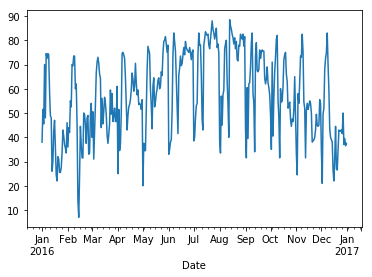

In [23]:
temp_ts.plot()

## Summary

In this lab, we learned about to use the pandas `Series` object.  We learned how to create and store data inside of `Series` objects, and that data stored within a series is statically typed (must all be of the same data type), or else it will all be cast to strings.  We also learned about how to access data through the index, how to slice individual data points as well as ranges of data, and how to set the index values ourselves to make the data easier to read and understand.  Finally, we got some practice working with real-world time series data, answered questions about it using built-in methods for descriptive statistics, and even visualized our data with a nice time series plot. 